In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.shape

(10841, 13)

## Data Cleaning

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
## Summary of the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [7]:
## Checking if the reviews only contains numerical strings
df['Reviews'].str.isnumeric().sum()

10840

In [8]:
df[~df['Reviews'].str.isnumeric()]## Getting the not numeric Review

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
## Dropping the Not Numerice Review row
df_copy = df.copy()

In [10]:
df_copy = df_copy.drop(df_copy.index[10472])

In [11]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [12]:
## Converting Reviews Column to int
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [13]:
## Cleaning the size column
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
df_copy["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [15]:
## As there are M and K in Size we will convert M to K
df_copy["Size"]=df_copy["Size"].str.replace("M","000")
df_copy["Size"]=df_copy["Size"].str.replace("k","")
df_copy["Size"]=df_copy["Size"].replace("Varies with device",np.nan)

In [16]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
df_copy["Size"]=df_copy["Size"].astype(float)

In [18]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [19]:
## Handling Missing Values in Size Column
df_copy["Size"].isnull().sum()

1695

In [20]:
df_copy["Size"].mode()

,Size
0,11000.0


In [21]:
df_copy["Size"]=df["Size"].map({np.nan:11000.0})

In [22]:
df_copy["Size"].isnull().sum()

10840

In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            0 non-null      float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.4+ MB


In [24]:
## Handling the Installs Column
df_copy["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [25]:
df_copy['Installs'] = df_copy['Installs'].str.replace('+', '')
df_copy['Installs'] = df_copy['Installs'].str.replace(',', '')
df_copy["Installs"].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [26]:
df_copy[~df_copy["Installs"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [27]:
df_copy["Installs"]=df_copy["Installs"].astype(int)

In [28]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            0 non-null      float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.4+ MB


In [29]:
## Handling The Price Column
df_copy["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [30]:
df_copy['Price'] = df_copy['Price'].str.replace('$', '')

In [31]:
df_copy['Price'].isnull().sum()

0

In [32]:
df_copy["Price"]=df_copy["Price"].astype(float)

In [33]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            0 non-null      float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.4+ MB


In [34]:
## Handling The Last Updated Feature
df_copy["Last Updated"].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [35]:
df_copy["Last Updated"]=pd.to_datetime(df_copy["Last Updated"])

In [36]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,NaN,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,NaN,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,NaN,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,NaN,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,NaN,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [37]:
df_copy["date"]=df_copy["Last Updated"].dt.day
df_copy["month"]=df_copy["Last Updated"].dt.month
df_copy["year"]=df_copy["Last Updated"].dt.year

In [38]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,date,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,NaN,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,NaN,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,NaN,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,NaN,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,NaN,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [39]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            0 non-null      float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  date            10840 non-null  int32         
 14  month           10840 non-null  int32         
 15  year   

In [40]:
df_copy.drop("Last Updated",axis=1,inplace=True)

In [41]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,date,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,NaN,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,NaN,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,NaN,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,NaN,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,NaN,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [42]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            0 non-null      float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  date            10840 non-null  int32  
 13  month           10840 non-null  int32  
 14  year            10840 non-null  int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 1.5+ MB


## EDA

In [43]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,date,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,NaN,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,NaN,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,NaN,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,NaN,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,NaN,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [45]:
## Checking App column
df_copy.duplicated('App').sum()

1181

In [50]:
## So dropping the duplicate values Because it has 1181 number of duplicate rows
df_copy.drop_duplicates(subset=['App'],keep='first',inplace=True)

In [51]:
df_copy.shape

(9659, 15)

In [53]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            0 non-null      float64
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Current Ver     9651 non-null   object 
 11  Android Ver     9657 non-null   object 
 12  date            9659 non-null   int32  
 13  month           9659 non-null   int32  
 14  year            9659 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 1.1+ MB


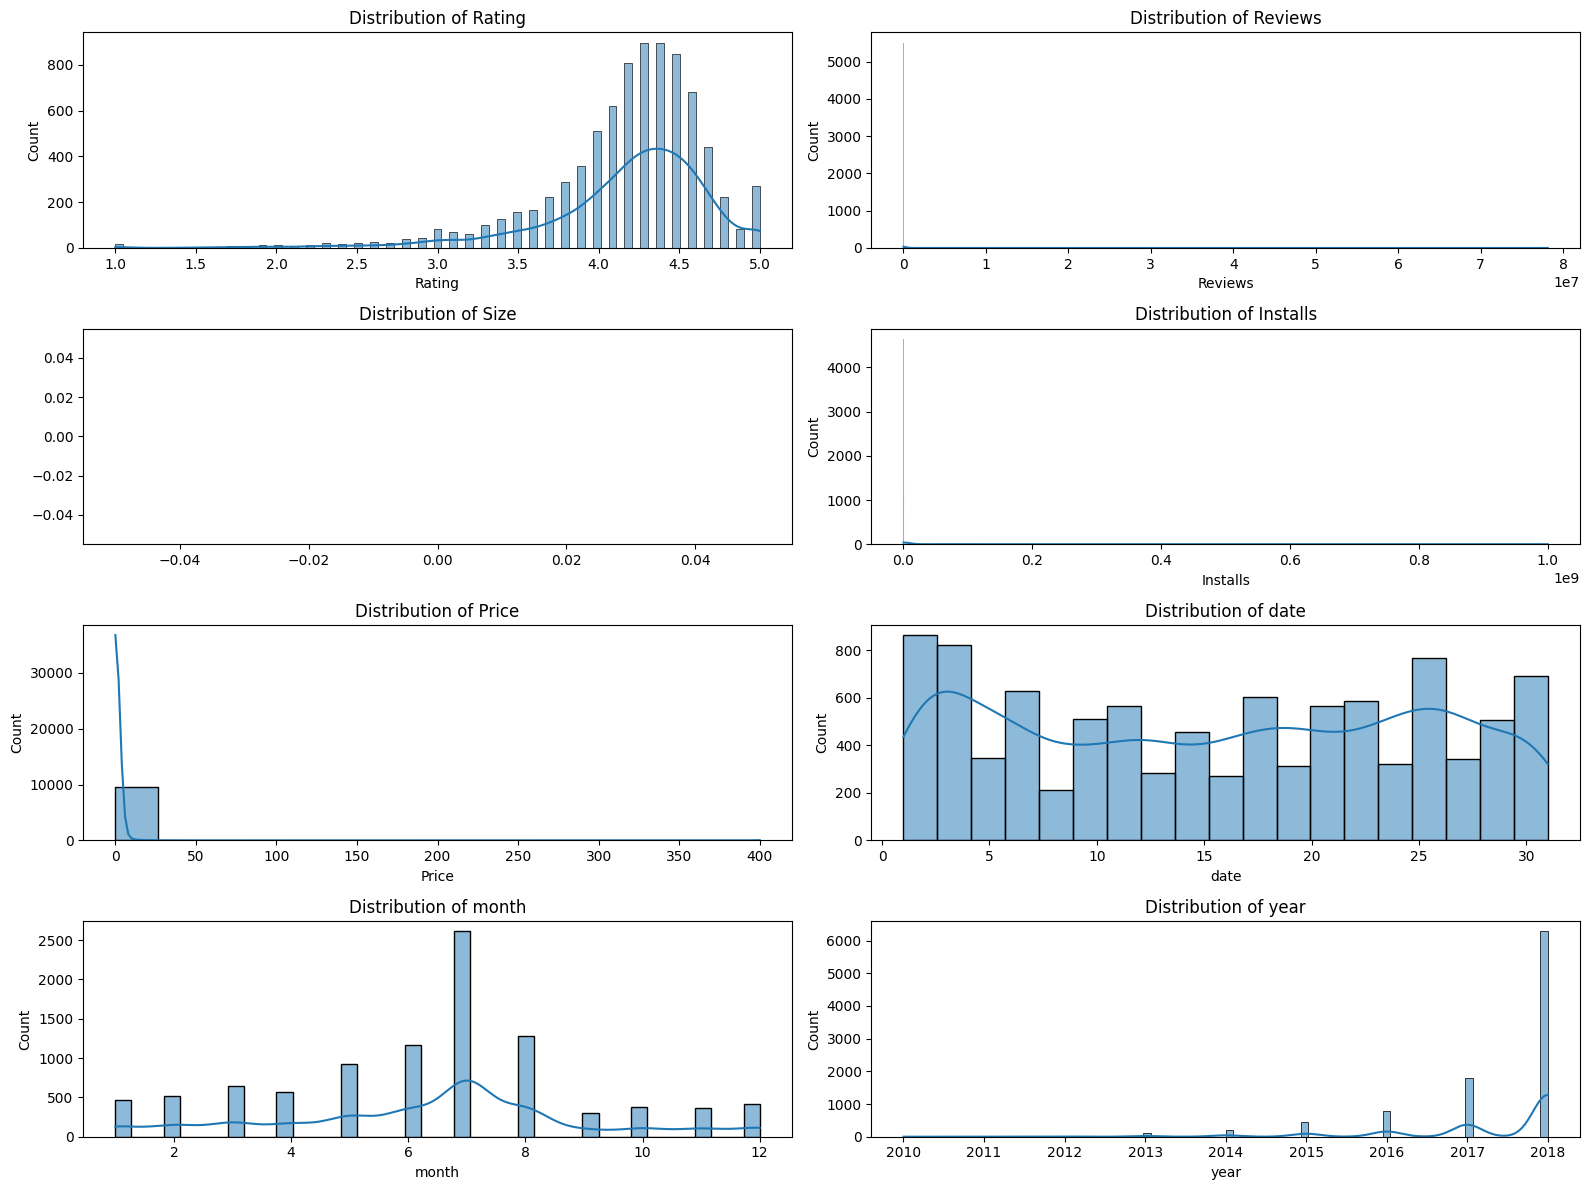

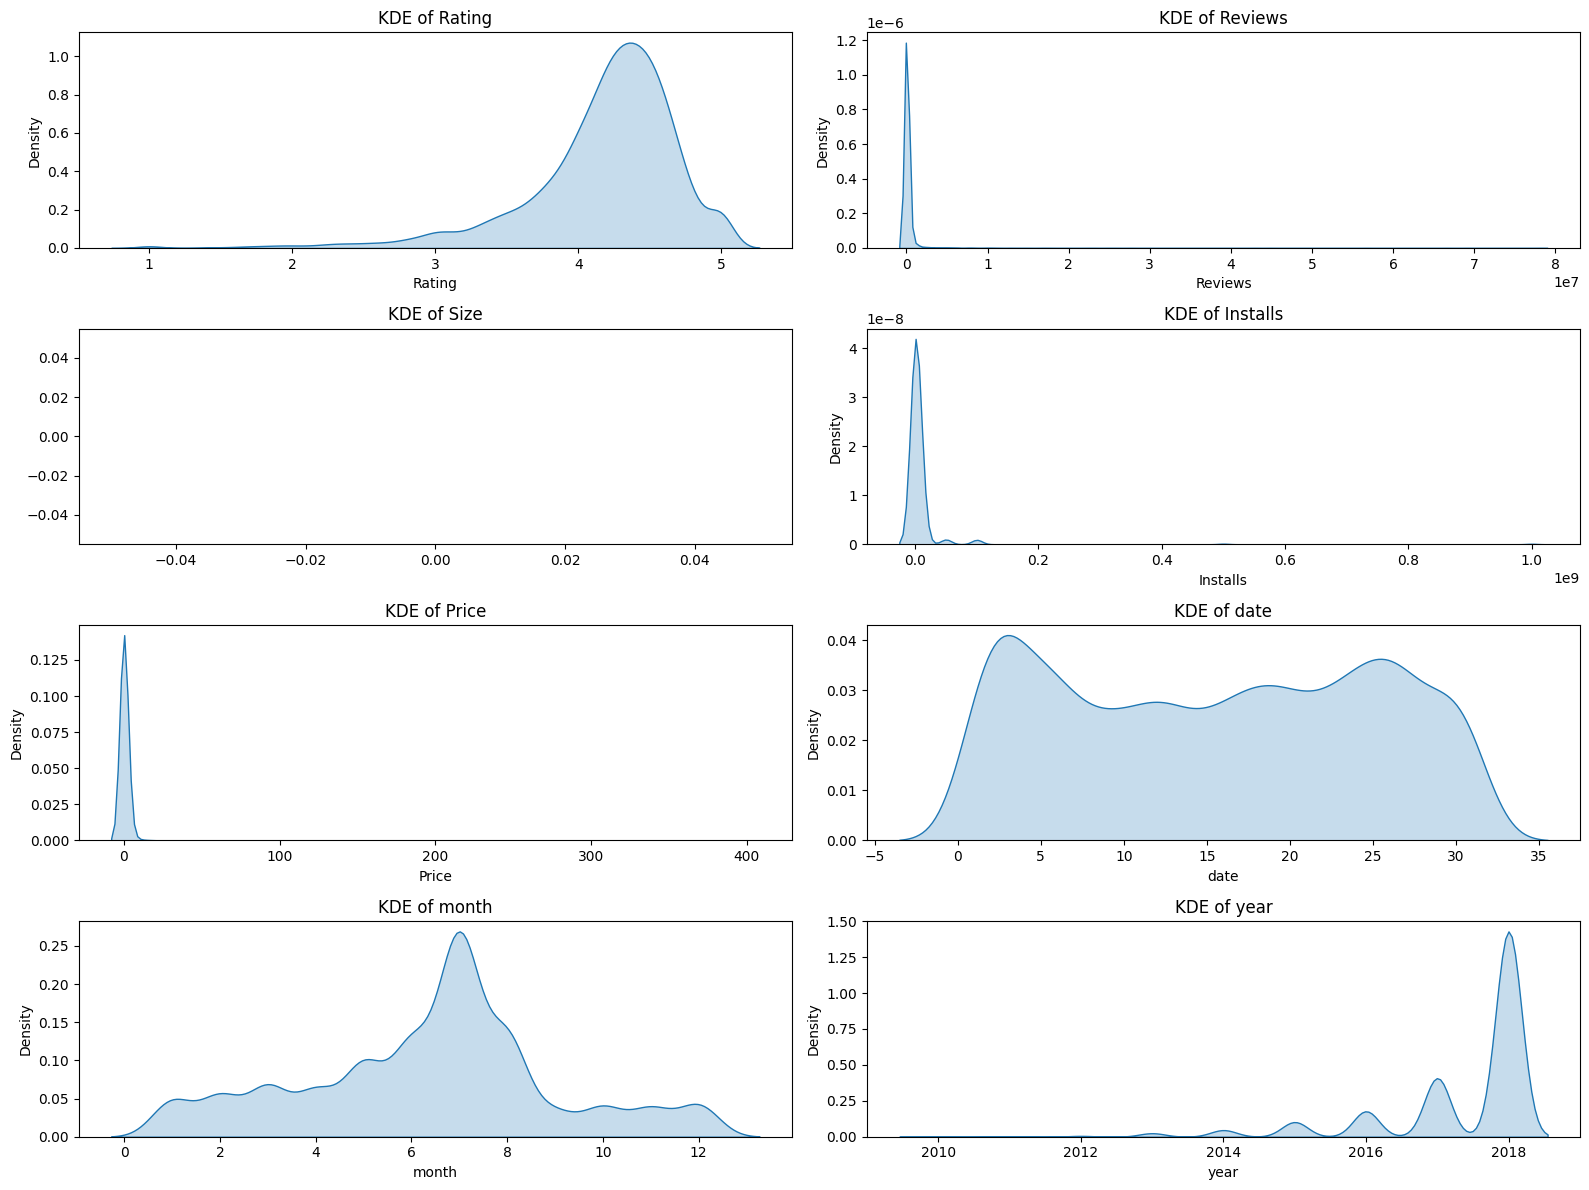

In [56]:
numerical_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'date', 'month', 'year']

plt.figure(figsize=(16, 12))

# Loop through numerical columns and create subplots for each feature (Histogram with KDE)
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)  # Adjust rows and cols based on the number of features
    sns.histplot(df_copy[col].dropna(), kde=True)  # Use histplot with Kernel Density Estimate (KDE)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

# Set plot size for KDE plots
plt.figure(figsize=(16, 12))

# Loop through numerical columns and create subplots for each feature (KDE plot)
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)
    sns.kdeplot(df_copy[col].dropna(), fill=True)  # KDE plot with area filled
    plt.title(f'KDE of {col}')
    plt.tight_layout()

plt.show()

<ipython-input-58-94ec7a65002c>:13: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  plt.tight_layout()
<ipython-input-58-94ec7a65002c>:13: UserWarning: Glyph 21021 (\N{CJK UNIFIED IDEOGRAPH-521D}) missing from current font.
  plt.tight_layout()
<ipython-input-58-94ec7a65002c>:13: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  plt.tight_layout()
<ipython-input-58-94ec7a65002c>:13: UserWarning: Glyph 21313 (\N{CJK UNIFIED IDEOGRAPH-5341}) missing from current font.
  plt.tight_layout()
<ipython-input-58-94ec7a65002c>:13: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  plt.tight_layout()
<ipython-input-58-94ec7a65002c>:13: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  plt.tight_layout()
<ipython-input-58-94ec7a65002c>:13: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  plt.tight_layout()
<ipython-input-58-94e

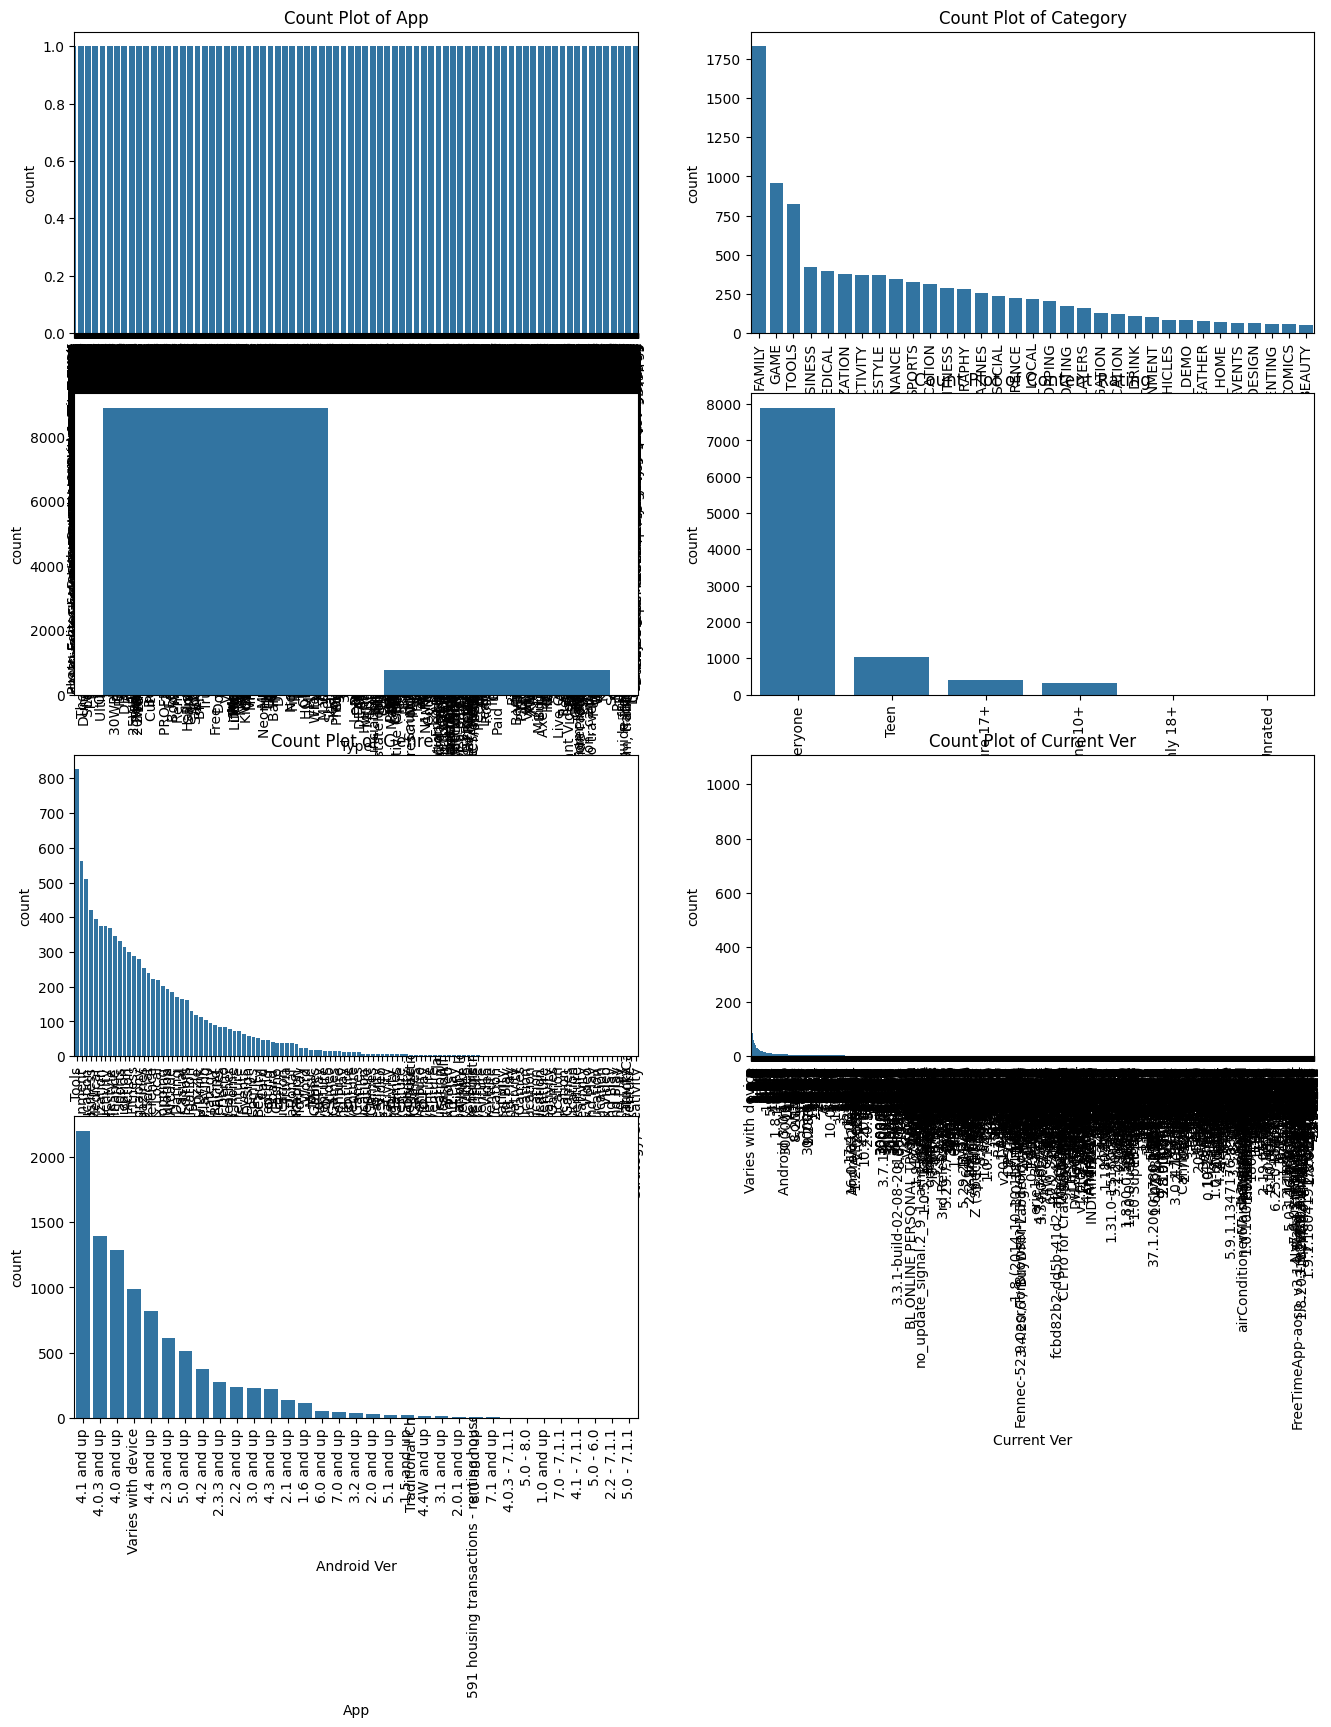

In [58]:
## When ever we have categories we use count plot
categorical_cols = ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']

# Set plot size for count plots
plt.figure(figsize=(16, 18))

# Loop through categorical columns and create count plots
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)  # Adjust rows and cols based on the number of features
    sns.countplot(data=df_copy, x=col, order=df_copy[col].value_counts().index)  # Sorting by count
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()

plt.show()

<Axes: ylabel='count'>

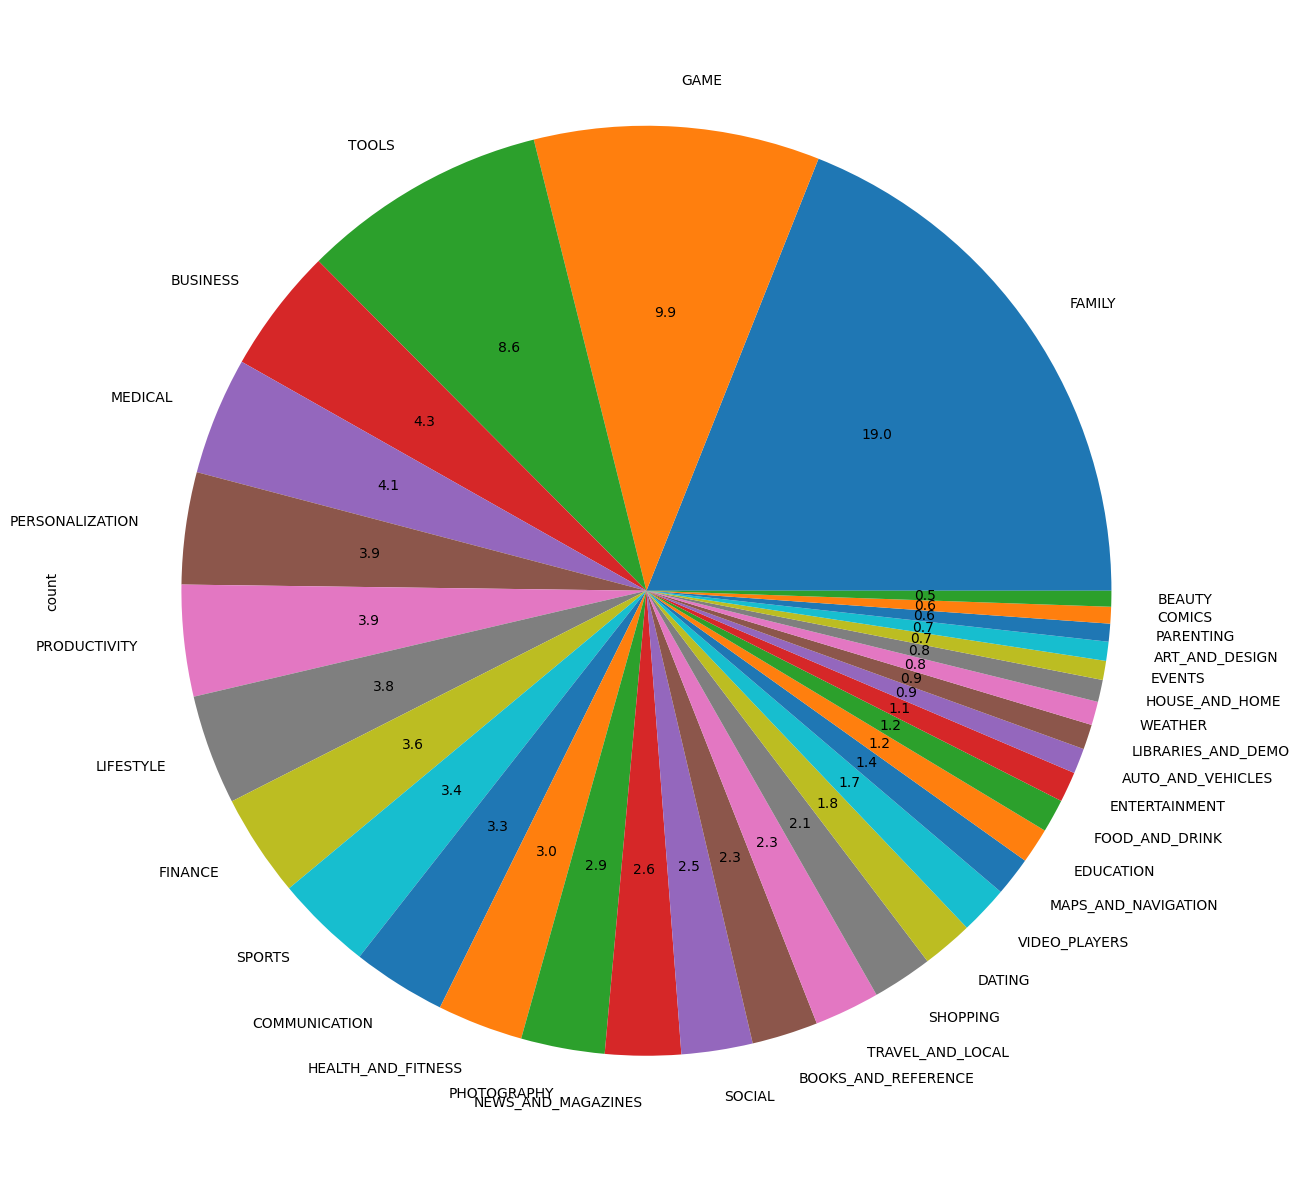

In [64]:
## Which is the most Popular app category
df_copy["Category"].value_counts().plot.pie(y=df_copy['Category'],figsize=(15,16),autopct='%1.1f')

In [65]:
## Top 10 App Category
df_copy["Category"].value_counts()

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


<ipython-input-66-2234a39b1fc6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

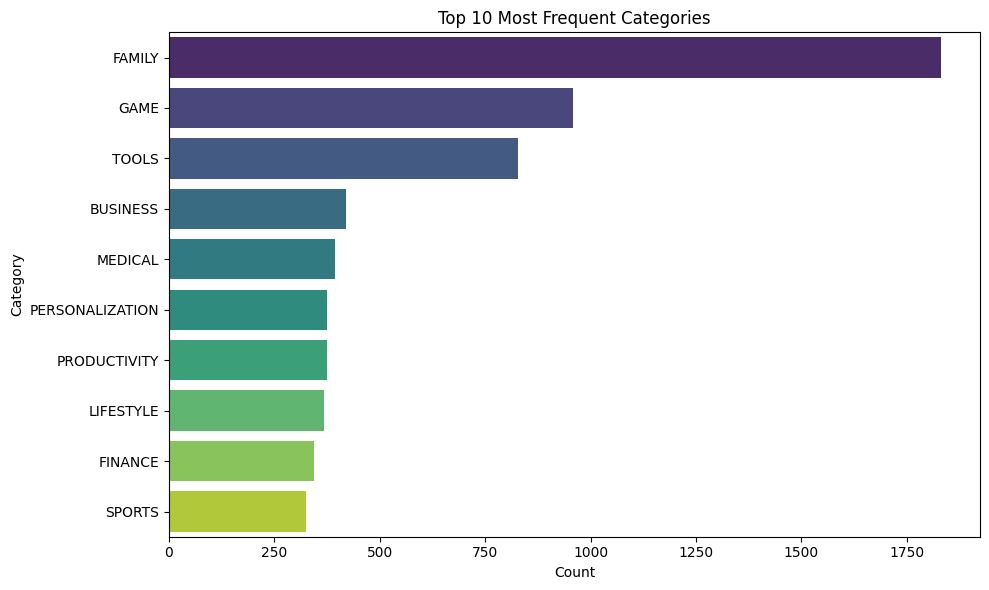

In [66]:
## Bar chart of Top 10 Categories
top_10_categories = df_copy['Category'].value_counts().head(10)

# Set plot size
plt.figure(figsize=(10, 6))

# Create the bar chart
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Top 10 Most Frequent Categories')

# Show the plot
plt.tight_layout()
plt.show()